In my analysis, I aim to segment buyers by age to determine the target audience. And also see which products are most popular among buyers.
Smile :)

In [23]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [2]:
df = pd.read_csv('/Users/juliatolchinskaya/Documents/pet_projects/Clothes/Womens_Clothing.csv',thousands=',')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Rename colums for better usablility

In [5]:
df = df.rename(columns={'Positive Feedback Count': 'positive_feedback_count', 'Division Name': 'division_name', 'Department Name':'department_name', 'Class Name': 'class_name', 'Clothing ID': 'clothing_id'})


In [6]:
df.head()

,Unnamed: 0,clothing_id,Age,Title,Review Text,Rating,Recommended IND,positive_feedback_count,division_name,department_name,class_name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


The best-selling clothing classes with a high rating

In [7]:
Count_of_sale_class = df.groupby( ['class_name'], as_index=False).agg({'clothing_id': 'count'})
Count_of_sale_class = Count_of_sale_class.rename(columns={'clothing_id': 'Count_of_sale'})
Count_of_sale_class.sort_values('Count_of_sale', ascending = False)

,class_name,Count_of_sale
3,Dresses,6319
8,Knits,4843
0,Blouses,3097
17,Sweaters,1428
13,Pants,1388
7,Jeans,1147
4,Fine gauge,1100
15,Skirts,945
6,Jackets,704
11,Lounge,691


Now we can understand which categories of clothing customers prefer to buy

<AxesSubplot:xlabel='class_name'>

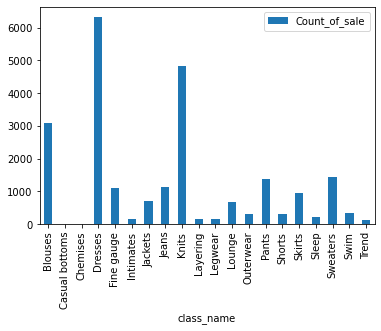

In [8]:
Count_of_sale_class.plot(kind="bar", x = 'class_name', y = 'Count_of_sale')

Age of buyers who have made purchases

In [9]:
Count_of_sale_age = df.groupby( ['Age'], as_index=False).agg({'clothing_id': 'count'})
Count_of_sale_age = Count_of_sale_age.rename(columns={'clothing_id': 'Count_of_sale'})


<AxesSubplot:xlabel='Age'>

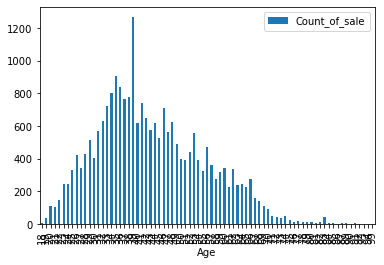

In [10]:
Count_of_sale_age.plot(kind="bar", x = 'Age', y = 'Count_of_sale')

In [12]:
Ages_of_big_sale = Count_of_sale_age.sort_values('Count_of_sale', ascending = False).head(20)
Ages_of_big_sale.sort_values('Age', ascending = False)

,Age,Count_of_sale
35,53,560
30,48,626
29,47,564
28,46,713
27,45,529
26,44,617
25,43,579
24,42,651
23,41,741
22,40,617


In [42]:
Count_of_sale_age.Age.describe()

count    77.000000
mean     56.142857
std      22.612709
min      18.000000
25%      37.000000
50%      56.000000
75%      75.000000
max      99.000000
Name: Age, dtype: float64

It can be concluded that the target audience of this company is people 29-53 years old

In [16]:
Count_of_sale_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            77 non-null     int64
 1   Count_of_sale  77 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


In [18]:
col = ['Age', 'Count_of_sale']

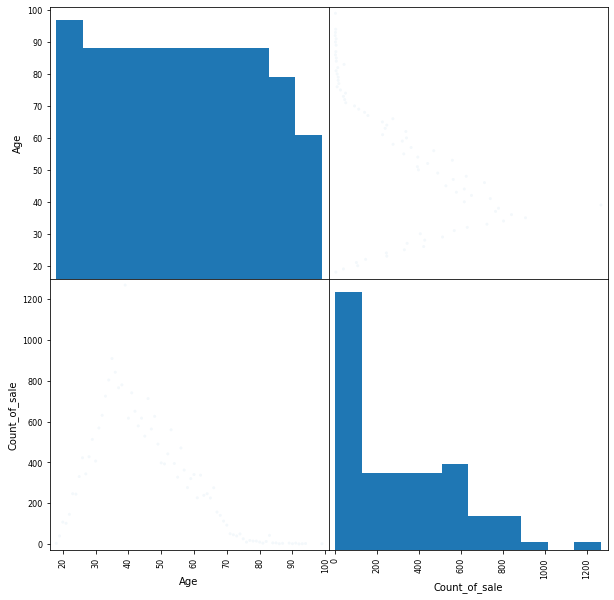

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(Count_of_sale_age[col], alpha=0.05, figsize=(10, 10));

In [20]:
Count_of_sale_age[col].corr() 

,Age,Count_of_sale
Age,1.000000,-0.614962
Count_of_sale,-0.614962,1.000000


In [21]:
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(Count_of_sale_age[col].values)

In [24]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

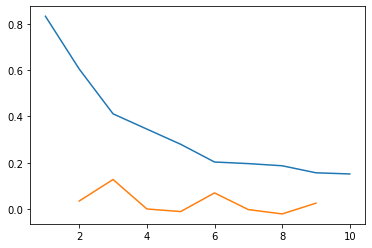

Рекомендованное количество кластеров: 3


In [25]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [26]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [34]:
# какое количество кластеров будете использовать!
nClust= 4

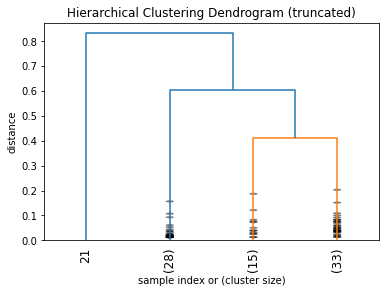

In [35]:
#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [36]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
col

['Age', 'Count_of_sale']

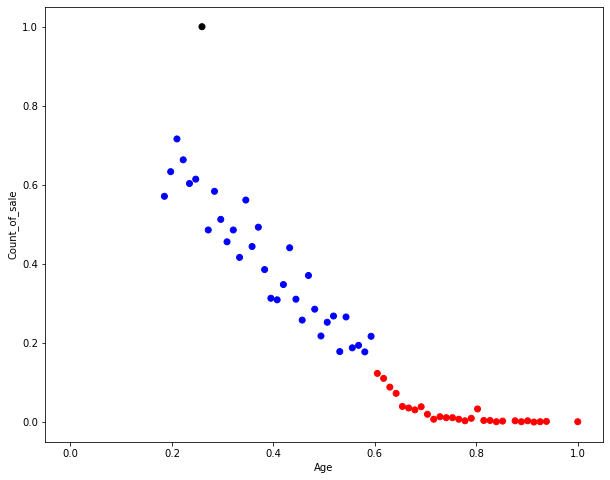

In [41]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [38]:
# к оригинальным данным добавляем номер кластера
Count_of_sale_age['I']=clusters
res=Count_of_sale_age.groupby('I')[col].mean()
res['Количество']=Count_of_sale_age.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,Age,Count_of_sale,Количество
I,,,
1,80.892857,31.571429,28
2,25.000000,302.533333,15
3,49.818182,508.939394,33
4,39.000000,1269.000000,1


In [46]:
 Count_of_sale_age[Count_of_sale_age['I']==1]

,Age,Count_of_sale,I
49,67,157,1
50,68,141,1
51,69,113,1
52,70,93,1
53,71,51,1
54,72,46,1
55,73,40,1
56,74,50,1
57,75,26,1
58,76,10,1


In [53]:
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [54]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [57]:
# к оригинальным данным добавляем номера кластеров
Count_of_sale_age['KMeans']=km.labels_+1
res=Count_of_sale_age.groupby('KMeans')[col].mean()
res['Количество']=Count_of_sale_age.groupby('KMeans').size().values
res

,Age,Count_of_sale,Количество
KMeans,,,
1,38.947368,707.631579,19
2,81.407407,26.925926,27
3,58.000000,341.526316,19
4,23.583333,235.416667,12


In [59]:
Count_of_sale_age[Count_of_sale_age['KMeans']==3] # изменяйте номер кластера, содержание которого хотите просмотреть


,Age,Count_of_sale,I,KMeans
31,49,490,3,3
32,50,398,3,3
33,51,393,3,3
34,52,442,3,3
35,53,560,3,3
36,54,395,3,3
37,55,328,3,3
38,56,471,3,3
39,57,363,3,3
40,58,277,3,3
